In [46]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
print("Estructura del dataset", df.shape)
df.head()

Estructura del dataset (16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
print("Información del dataset:")
df.info()


print("\nEstadísticas descriptivas:")
df.describe()



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory u

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [73]:
print("\nValores nulos por columna:")
print(df.isnull().sum())



Valores nulos por columna:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


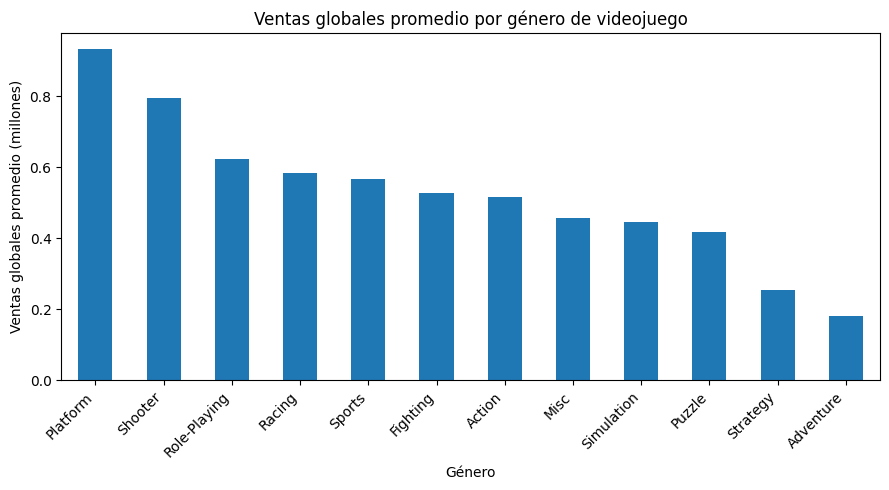

In [43]:
sales_by_genre = (
    df.groupby("Genre")["Global_Sales"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(9, 5))
sales_by_genre.plot(kind="bar")
plt.title("Ventas globales promedio por género de videojuego")
plt.xlabel("Género")
plt.ylabel("Ventas globales promedio (millones)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


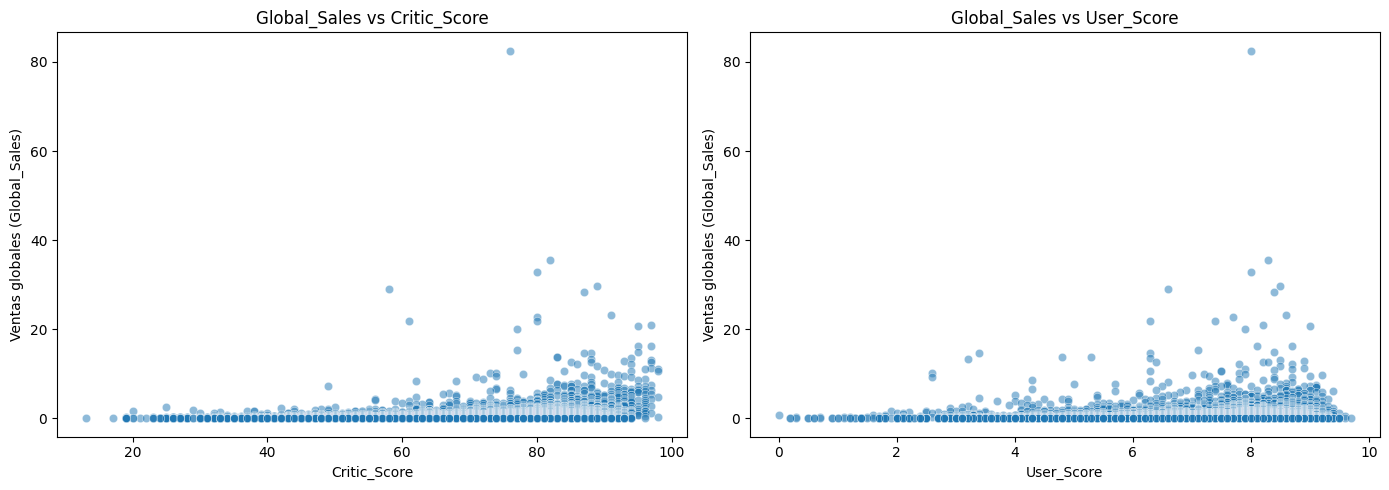

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(
    data=df, x="Critic_Score", y="Global_Sales", alpha=0.5, ax=axes[0]
)
axes[0].set_title("Global_Sales vs Critic_Score")

sns.scatterplot(
    data=df, x="User_Score", y="Global_Sales", alpha=0.5, ax=axes[1]
)
axes[1].set_title("Global_Sales vs User_Score")

for ax in axes:
    ax.set_ylabel("Ventas globales (Global_Sales)")

plt.tight_layout()
plt.show()

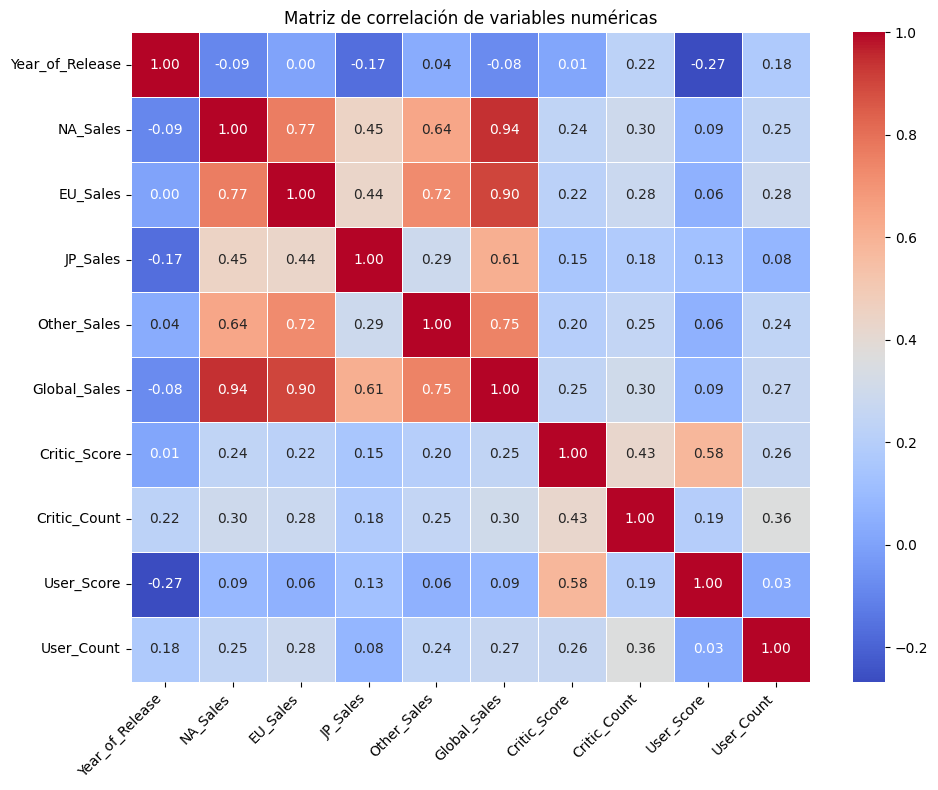

Top 5 variables más correlacionadas con 'Global_Sales':
NA_Sales        0.941010
EU_Sales        0.901239
Other_Sales     0.749242
JP_Sales        0.612300
Critic_Count    0.303571
Name: Global_Sales, dtype: float64


In [ ]:
import numpy as np

numeric_cols = [
    "Year_of_Release", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales",
    "Global_Sales", "Critic_Score", "Critic_Count",
    "User_Score", "User_Count"
]

df[numeric_cols] = df[numeric_cols].replace('tbd', np.nan)


df[numeric_cols] = df[numeric_cols].apply(
    pd.to_numeric, errors='coerce'
)


corr = df[numeric_cols].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cmap="coolwarm"
)
plt.title("Matriz de correlación de variables numéricas")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


target = "Global_Sales"

target_corr = (
    corr[target]
    .drop(target)
    .sort_values(key=lambda x: x.abs(), ascending=False)
)

print(f"Top 5 variables más correlacionadas con '{target}':")
print(target_corr.head())



In [6]:
numeric_cols = [
    "Year_of_Release",
    "Critic_Score", "Critic_Count",
    "User_Score", "User_Count"
]

cat_cols = ["Platform", "Genre", "Publisher", "Developer", "Rating"]



In [ ]:
def replace_tbd_with_nan(df: pd.DataFrame) -> pd.DataFrame:
    numeric_cols = [
    "Year_of_Release",
    "Critic_Score", "Critic_Count",
    "User_Score", "User_Count"
    ]


    df[numeric_cols] = df[numeric_cols].replace("tbd", np.nan)
    return df

In [ ]:
def ensure_numeric(df: pd.DataFrame, cols=numeric_cols) -> pd.DataFrame:

    df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")
    return df

In [ ]:
def fill_missing_publisher_developer(df: pd.DataFrame, cols = ["Publisher", "Developer"]) -> pd.DataFrame:

    for col in cols:
        if col in df.columns:
            df[col] = df[col].fillna("Unknown")
    return df

In [ ]:
def fill_cats_with_mode(df: pd.DataFrame, cols=["Genre", "Platform", "Rating"]) -> pd.DataFrame:

    for col in cols:
        if col in df.columns:
            mode_val = df[col].mode(dropna=True)
            if not mode_val.empty:
                df[col] = df[col].fillna(mode_val[0])
    return df


In [ ]:
def normalize_categories(df: pd.DataFrame, cols = cat_cols) -> pd.DataFrame:

    for col in cols:
        if col in df.columns:
            df[col] = (
                df[col]
                .astype(str)      
                .str.strip()      
                .str.lower()      
            )
            
    return df


In [12]:
def drop_duplicate_columns(df: pd.DataFrame) -> pd.DataFrame:
    df = df.drop_duplicates()
    return df

In [ ]:
def drop_rows_without_name_year(df):
    df = df[~df["Name"].isna()]
    df = df[~df["Year_of_Release"].isna()]   
    return df

In [ ]:
def impute_numeric_missing(df: pd.DataFrame,
                           cols=["Critic_Score", "Critic_Count", "User_Score", "User_Count"],
                           strategy: str = "median") -> pd.DataFrame:
 
    for col in cols:
        if col in df.columns:
            if strategy == "median":
                fill_value = df[col].median()
            elif strategy == "mean":
                fill_value = df[col].mean()
            else:
                raise ValueError("strategy debe ser 'median' o 'mean'")

            df[col] = df[col].fillna(fill_value)

    return df


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomDataCleaner(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        df = X.copy()
        
        df = normalize_categories(df)
        df = drop_duplicate_columns(df)
        df = replace_tbd_with_nan(df)
        df = ensure_numeric(df)
        df = fill_missing_publisher_developer(df)
        df = fill_cats_with_mode(df)
        df = impute_numeric_missing(df)
        
        
        return df

custom_cleaner = CustomDataCleaner()

In [16]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

full_pipeline = Pipeline(steps=[
    ("clean", custom_cleaner),         
    ("preprocess", preprocess),     
    ("model", LinearRegression())  
])

full_pipeline_rf = Pipeline(steps=[
    ("clean", custom_cleaner),
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])


print("\n=== PIPELINE COMPLETO ===")
print(full_pipeline)


=== PIPELINE COMPLETO ===
Pipeline(steps=[('clean', CustomDataCleaner()),
                ('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year_of_Release',
                                                   'Critic_Score',
                                                   'Critic_Count', 'User_Score',
                                                   'User_Count']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   Simpl

In [17]:
df_model = df.copy()
df_model = drop_rows_without_name_year(df_model)

target_col = "Global_Sales"
y = df_model[target_col]
X = df_model.drop(columns=[target_col, "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
full_pipeline.fit(X_train, y_train)
y_pred = full_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
joblib.dump(full_pipeline,"modelo_lr.pkl")

print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")

MAE:  0.520
RMSE: 1.831
R²:   0.205


In [103]:
full_pipeline_rf.fit(X_train, y_train)
y_pred = full_pipeline_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
joblib.dump(full_pipeline_rf,"modelo_rf.pkl")

print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")

MAE:  0.390
RMSE: 1.687
R²:   0.325


In [105]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("videojuegos_ventas_globales")


2025/11/16 16:20:00 INFO mlflow.tracking.fluent: Experiment with name 'videojuegos_ventas_globales' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/1', creation_time=1763328000754, experiment_id='1', last_update_time=1763328000754, lifecycle_stage='active', name='videojuegos_ventas_globales', tags={}>

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def train_eval_log(pipeline, model_name, params=None):

    with mlflow.start_run(run_name=model_name):
        
        if params is not None:
            mlflow.log_params(params)

        pipeline.fit(X_train, y_train)

        y_pred = pipeline.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        mlflow.log_metric("mae", mae)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2", r2)

        mlflow.sklearn.log_model(pipeline, name="model")

        print(f"\n=== Resultados {model_name} ===")
        print(f"MAE:  {mae:.3f}")
        print(f"RMSE: {rmse:.3f}")
        print(f"R²:   {r2:.3f}")


In [ ]:

params_lr = {
    "modelo": "LinearRegression",
    "version": "1.0",
}

train_eval_log(full_pipeline, model_name="linear_regression", params=params_lr)


2025/11/16 16:20:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/16 16:21:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



=== Resultados linear_regression ===
MAE:  0.520
RMSE: 1.831
R²:   0.205
🏃 View run linear_regression at: http://127.0.0.1:5000/#/experiments/1/runs/b606145eeabb4e4ca0b50e11b22da6e1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


In [109]:
params_rf = {
    "modelo": "RandomForestRegressor",
    "version": "1.0",
    "n_estimators": 200,
    "random_state": 42,
    "n_jobs": -1,
}

train_eval_log(full_pipeline_rf, model_name="random_forest", params=params_rf)

2025/11/16 16:23:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



=== Resultados random_forest ===
MAE:  0.390
RMSE: 1.687
R²:   0.325
🏃 View run random_forest at: http://127.0.0.1:5000/#/experiments/1/runs/702f9b96cbbf4024bfe88adc2c80b270
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
